In [1]:
%pip install -U scikit-learn imbalanced-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/8.7 MB 2.7 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.7 MB 2.3 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.7 MB 2.3 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.7 MB 2.3 MB/s eta 0:00:04
   -------- ------------------------------- 1.8/8.7 MB 1.3 MB/s eta 0:00:06
   -------- ------------------------------- 1.8/8.7 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 2.1/8.7 MB 1.3 MB/s eta 0:00:06
   ---------- ----------------------------- 2.4/8.7 MB 1.2 MB/s eta 0:00:06
   ---------- ----------------------------- 2.4/8.7 MB 1.2 MB/s eta 0:00:06
   ------------ --------------------------- 2.6/8.7 MB 1.1 MB/s eta 0:00:06
   ------------ ----------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 3.

In [4]:
file_path = '../data/asthma_disease_data.csv'
df = pd.read_csv(file_path)
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [5]:
# Dropping irrelevant columns
df_cleaned = df.drop(columns=['PatientID', 'DoctorInCharge'])
print("Columns dropped. New shape:", df_cleaned.shape)

Columns dropped. New shape: (2392, 27)


In [6]:
# Defining features (x) and target (y)
X = df_cleaned.drop(columns=['Diagnosis'])
y = df_cleaned['Diagnosis']

In [7]:
# Splitting the data now to prevent "data leakage"
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% of data will be for testing
    random_state=42,     # for reproducibility
    stratify=y           # to preserve the class distribution in both sets
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nTraining set diagnosis distribution:\n", y_train.value_counts(normalize=True))
print("\nTesting set diagnosis distribution:\n", y_test.value_counts(normalize=True))

Training set shape: (1913, 26)
Testing set shape: (479, 26)

Training set diagnosis distribution:
 Diagnosis
0    0.948249
1    0.051751
Name: proportion, dtype: float64

Testing set diagnosis distribution:
 Diagnosis
0    0.947808
1    0.052192
Name: proportion, dtype: float64


In [8]:
# Creating a preprocessing pipeline to handle categorical and numerical features differently
# Identifying categorical features that need encoding
# Even though Gender, Smoking etc. are 0/1, OneHotEncoder handles them correctly.
categorical_features = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'PetAllergy', 
                        'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever', 
                        'GastroesophagealReflux', 'ExerciseInduced']

# Identifying numerical features that need scaling
numerical_features = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 
                    'PollutionExposure', 'PollenExposure', 'DustExposure', 'LungFunctionFEV1', 
                    'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 
                    'Coughing', 'NighttimeSymptoms']

# Creating the preprocessing pipelines for numerical and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

In [9]:
# Applying the preprocessing pipeline to my training and testing data
# Fitting the preprocessor on the training data and transform it
X_train_processed = preprocessor.fit_transform(X_train)

# Transforming the test data using the already-fitted preprocessor
X_test_processed = preprocessor.transform(X_test)

print("Training data shape after processing:", X_train_processed.shape)
print("Testing data shape after processing:", X_test_processed.shape)

Training data shape after processing: (1913, 41)
Testing data shape after processing: (479, 41)


In [10]:
# Using SMOTE (Synthetic Minority Over-sampling Technique) to generate new synthetic
# samples for the minority class (positive diagnosis)

# Checking the class distribution before SMOTE
print("Before SMOTE, counts of label '1': {}".format(sum(y_train == 1)))
print("Before SMOTE, counts of label '0': {} \n".format(sum(y_train == 0)))

# Initializing SMOTE
smote = SMOTE(random_state=42)

# Applying SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print('----------------------------------------------------')
# Checking the class distribution after SMOTE
print("After SMOTE, the shape of X_train_resampled: {}".format(X_train_resampled.shape))
print("After SMOTE, the shape of y_train_resampled: {} \n".format(y_train_resampled.shape))

print("After SMOTE, counts of label '1': {}".format(sum(y_train_resampled == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_resampled == 0)))

Before SMOTE, counts of label '1': 99
Before SMOTE, counts of label '0': 1814 

----------------------------------------------------
After SMOTE, the shape of X_train_resampled: (3628, 41)
After SMOTE, the shape of y_train_resampled: (3628,) 

After SMOTE, counts of label '1': 1814
After SMOTE, counts of label '0': 1814


## Conclusion and summary

The preprocessing of the dataset is now complete. The following key steps were performed:

1.  **Dropped irrelevant columns:** `PatientID` and `DoctorInCharge` were removed.
2.  **Train-test split:** The data was split into training (80%) and testing (20%) sets, stratified to maintain the original class distribution.
3.  **Feature transformation:** A `ColumnTransformer` pipeline was built to:
    - Apply `StandardScaler` to all numerical features.
    - Apply `OneHotEncoder` to all categorical features.
4.  **Class imbalance handling:** The severe class imbalance in the **training set** was corrected using the SMOTE (Synthetic Minority Over-sampling Technique), resulting in a perfectly balanced set of training data.

The following datasets are now ready for the model training phase:

-   `X_train_resampled`: The balanced and preprocessed training features.
-   `y_train_resampled`: The balanced training labels.
-   `X_test_processed`: The preprocessed testing features.
-   `y_test`: The original, untouched testing labels for a realistic evaluation of the model.

In [12]:
# Saving the preprocessor object
# It's a good idea to save it in the 'src' directory as it's part of the project's source logic
joblib.dump(preprocessor, '../src/preprocessor.joblib')
print("Preprocessor saved to ../src/preprocessor.joblib")

# Saving the processed data arrays to a single compressed file in the 'data' directory
np.savez('../data/processed_asthma_data.npz',
         X_train=X_train_resampled,
         y_train=y_train_resampled,
         X_test=X_test_processed,
         y_test=y_test)

print("Processed data saved to ../data/processed_asthma_data.npz")

Preprocessor saved to ../src/preprocessor.joblib
Processed data saved to ../data/processed_asthma_data.npz


# Problem 5

New features 'FEV1_FVC_Ratio' and 'SymptomScore' created.
Dropped 11 columns. Remaining columns: ['Ethnicity', 'EducationLevel', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC', 'Diagnosis', 'FEV1_FVC_Ratio', 'SymptomScore']


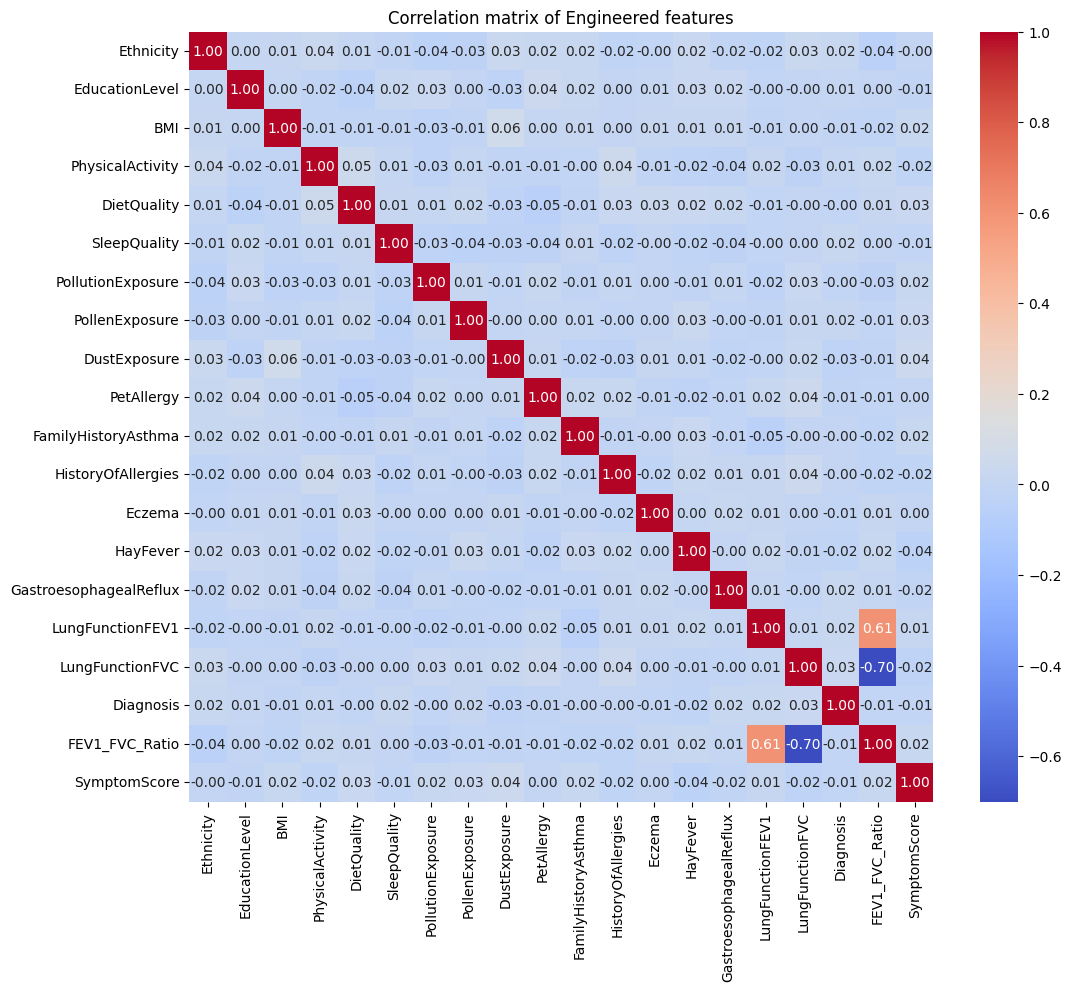

Categorical features to be encoded: ['Ethnicity', 'EducationLevel', 'PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux', 'SymptomScore']
Numerical features to be scaled: ['BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure', 'LungFunctionFEV1', 'LungFunctionFVC', 'FEV1_FVC_Ratio']
Final training set shape: (3628, 37)
Final testing set shape: (479, 37)
Balanced training set counts:
Diagnosis
0    1814
1    1814
Name: count, dtype: int64


In [21]:
file_path = '../data/asthma_disease_data.csv'
df = pd.read_csv(file_path)

# Creating the FEV1/FVC ratio
# I will add a small number to FVC to avoid division by zero, just in case.
df['FEV1_FVC_Ratio'] = df['LungFunctionFEV1'] / (df['LungFunctionFVC'] + 1e-6)

# Creating an aggregated Symptom Score
symptom_columns = ['Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced']
df['SymptomScore'] = df[symptom_columns].sum(axis=1)

print("New features 'FEV1_FVC_Ratio' and 'SymptomScore' created.")

# Dropping original symptom columns now that we have the score
# Also dropping weak predictors identified in EDA and irrelevant IDs
columns_to_drop = [
    'PatientID', 'DoctorInCharge', # Irrelevant IDs
    'Age', 'Gender', 'Smoking',      # Weak predictors from EDA
] + symptom_columns # Original symptom columns

df_engineered = df.drop(columns=columns_to_drop)
print(f"Dropped {len(columns_to_drop)} columns. Remaining columns: {df_engineered.columns.tolist()}")

# Visualizing correlations of the remaining numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df_engineered.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix of Engineered features')
plt.show()

# Defining Features (X) and Target (y) ---
X = df_engineered.drop(columns=['Diagnosis'])
y = df_engineered['Diagnosis']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Updating the lists of categorical and numerical features based on our changes
categorical_features = X.select_dtypes(include=['int64', 'object']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64']).columns.tolist()

print(f"Categorical features to be encoded: {categorical_features}")
print(f"Numerical features to be scaled: {numerical_features}")

# Building the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Applying Transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Handling Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print(f"Final training set shape: {X_train_resampled.shape}")
print(f"Final testing set shape: {X_test_processed.shape}")
print(f"Balanced training set counts:\n{pd.Series(y_train_resampled).value_counts()}")

### Summary of Feature manipulation

This notebook successfully transformed the raw data into a refined, model-ready format. The process involved two main stages: feature engineering and feature selection, followed by the final preprocessing pipeline.

#### 1. Feature engineering
Two new, powerful features were created to better capture the underlying patterns in the data:
* **`FEV1_FVC_Ratio`**: This feature was created by dividing `LungFunctionFEV1` by `LungFunctionFVC`. This is a standard clinical metric for diagnosing obstructive lung diseases like asthma, potentially capturing the interaction between these two features more effectively than the individual features alone.
* **`SymptomScore`**: This feature was created by summing up the six binary symptom columns (e.g., `Wheezing`, `Coughing`, etc.). This consolidates multiple related features into a single, more powerful ordinal feature representing a patient's overall symptom burden.

#### 2. Feature selection
To create a more focused and potentially more robust model, several columns were removed:
* **Weak predictors**: Based on the findings from the EDA, `Age`, `Gender`, and `Smoking` were removed as they showed little to no predictive power.
* **Redundant and irrelevant features**: The original six symptom columns were dropped after being aggregated into the `SymptomScore`. The identifier columns `PatientID` and `DoctorInCharge` were also removed.

#### 3. Correlation matrix analysis
A correlation matrix was generated to check for multicollinearity (high correlation between predictor variables) among the final set of features. The analysis of the heatmap reveals several key points:

* **Low overall correlation**: The vast majority of features have very low correlation with each other (values are close to 0). This is excellent, as it suggests that each feature provides independent information to the model.
* **Lung function relationship**: The most notable correlations are between the lung function measurements. As expected, `LungFunctionFVC` has a moderate positive correlation with `LungFunctionFEV1` (**0.61**) and a strong positive correlation with our engineered `FEV1_FVC_Ratio` (**0.70**). This confirms these variables are related, and engineering the ratio was a good way to capture this relationship.
* **No problematic multicollinearity**: Crucially, there are no pairs of features with extremely high correlation (e.g., > 0.8 or < -0.8). This indicates that multicollinearity is not a major concern in the final feature set.
* **Note on target correlation**: The direct correlation of features with the `Diagnosis` column appears low in the heatmap. This is likely an effect of the severe class imbalance in the data, which makes the Pearson correlation coefficient misleading for binary targets. The relationships we identified visually in the EDA (the box plots and count plots) are a more reliable indicator of feature importance.